## Steps 
- Data ingestion
- EDA 
- Preprocessing
- Model building 
- model test 

## Data Ingestion 
1. import libraries 
2. Load the data 
3. Load the data into a dataframe 
4. Convert Date column into datetime if necessary
5. Make the Date column into Index 

In [1]:
# import libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data 
df = pd.read_csv('TSLA.CSV')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [3]:
# we only work with data and close 
stock_data = df[['Date','Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [5]:
# date ke datetime e convert korte hbe 
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [7]:
# assign date column to index 
stock_data.set_index('Date',inplace=True)

In [8]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## Why we set Date as index ?
- 1. Easily retirve 2. visulaization easy hoi 

## EDA of the Data 
1. Summary statistics 
2. Visualization 
3. Stationarity Check (ADF & Moving avarage)
4. ACF,PACF calculate 
5. Outlier check 

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [10]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [11]:
# statistics summary 
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


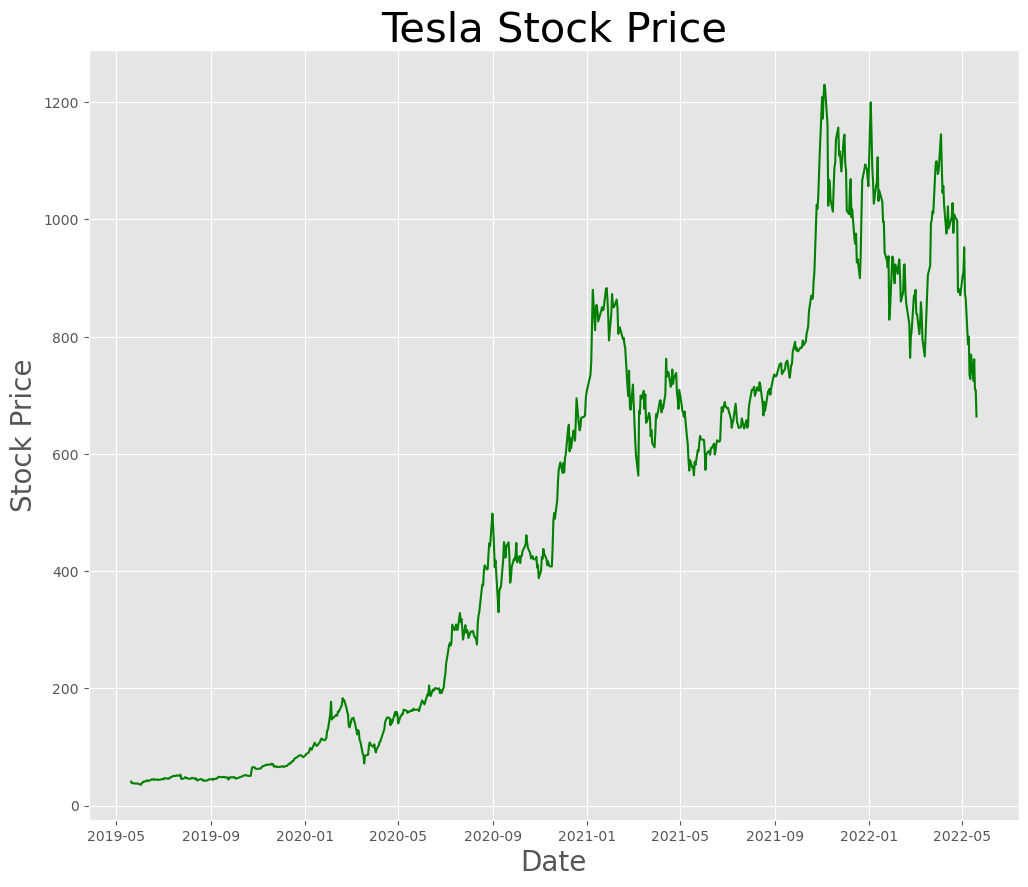

In [12]:
# visualisation 
plt.style.use('ggplot')

plt.figure(figsize=(12,10))
plt.plot(stock_data['Close'],color='green')

plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.title('Tesla Stock Price',fontsize=30)

plt.grid(True)


In [13]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


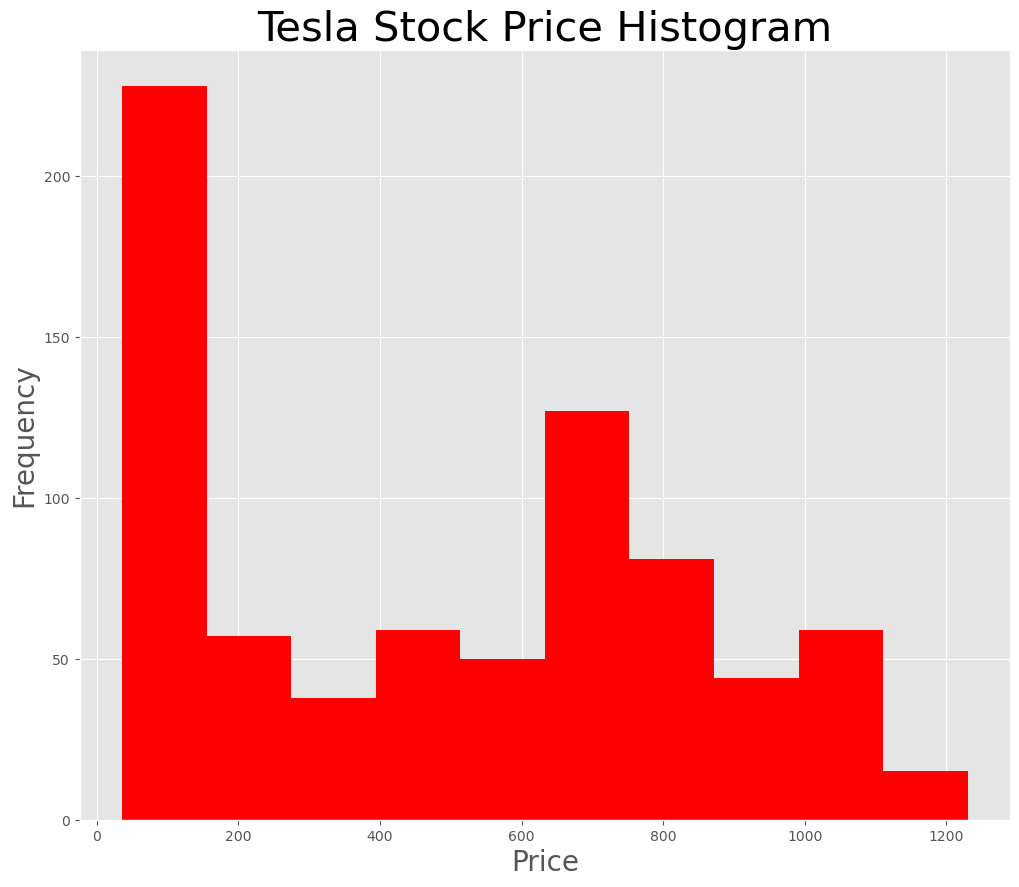

In [14]:
# hitogram 
# visualisation 
plt.style.use('ggplot')

plt.figure(figsize=(12,10))
plt.hist(stock_data['Close'],color='red')

plt.xlabel('Price',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Tesla Stock Price Histogram',fontsize=30)

plt.grid(True)


<Figure size 1200x1000 with 0 Axes>

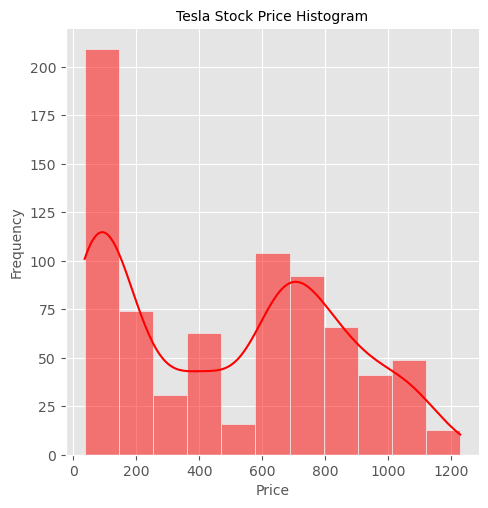

In [15]:
# displot 
# visualisation 
plt.style.use('ggplot')

plt.figure(figsize=(12,10))
sns.displot(stock_data['Close'],kde=True,color='red')

plt.xlabel('Price',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Tesla Stock Price Histogram',fontsize=10)

plt.grid(True)


In [16]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [17]:
# Moving Avarage mean and std calculate 
rollmean = stock_data['Close'].rolling(20).mean()
rollstd = stock_data['Close'].rolling(20).std()

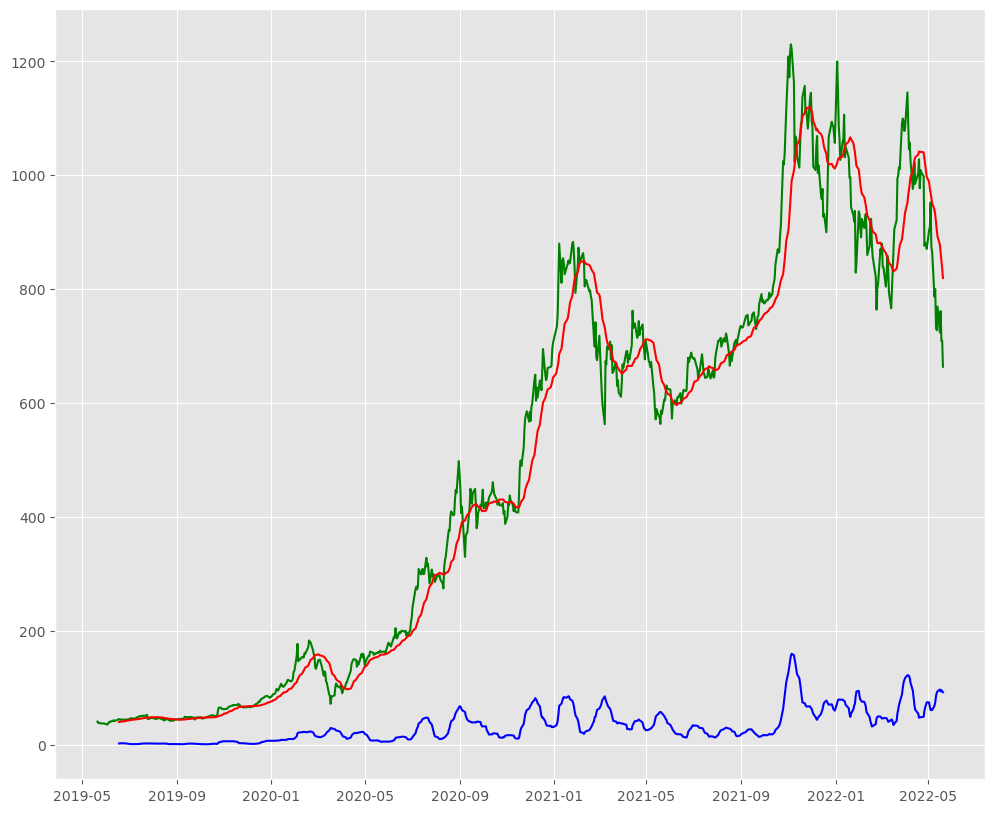

In [18]:
# plot
plt.figure(figsize=(12,10))
plt.plot(stock_data['Close'] , color='green')
plt.plot(rollmean,color='red')
plt.plot(rollstd,color='blue')

- joto window size barabo toto valo smoothen hobe 

In [19]:
# stationarity check 
# ADF - agmented dicky fuler test(adfuler)

In [20]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(stock_data['Close'])
adf

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [21]:
# 1st 4 te ke extract korbo 
pd.Series(adf[0:4],index=['Test Stats','P value','Lag value','Data Points'])

Test Stats      -1.363009
P value          0.599876
Lag value        9.000000
Data Points    748.000000
dtype: float64

In [22]:
# if p > 0.05 -> non staitobnary 
# if p<=0.05 ->stationary 

## here p value = 0.59 
- so data is non stationary 

In [23]:
# function for stationarity check 

def stationarity_check(timeseries):
    
    #roll mean calculate
    rollmean= timeseries.rolling(45).mean()
    #rolling std 
    rollstd = timeseries.rolling(45).std()
    
    #plot the graph
    plt.figure(figsize=(12,10))
    plt.plot(timeseries,color='green' ,label='actual')
    plt.plot(rollmean,color='red' ,label='rollmean')
    plt.plot(rollstd,color='blue',label='rollstd')
    plt.legend()
    plt.xlabel('Date',fontsize=20)
    plt.ylabel('Stock Price' , fontsize=20)
    plt.title('Rolling mean and STD' , fontsize=30)
    
    
    #adf test 
    from statsmodels.tsa.stattools import adfuller
    adf = adfuller(timeseries)
    output = pd.Series(adf[0:4],index=['Test Stats','P value','Lag value','Data Points'])
    print(output)

Test Stats      -1.363009
P value          0.599876
Lag value        9.000000
Data Points    748.000000
dtype: float64


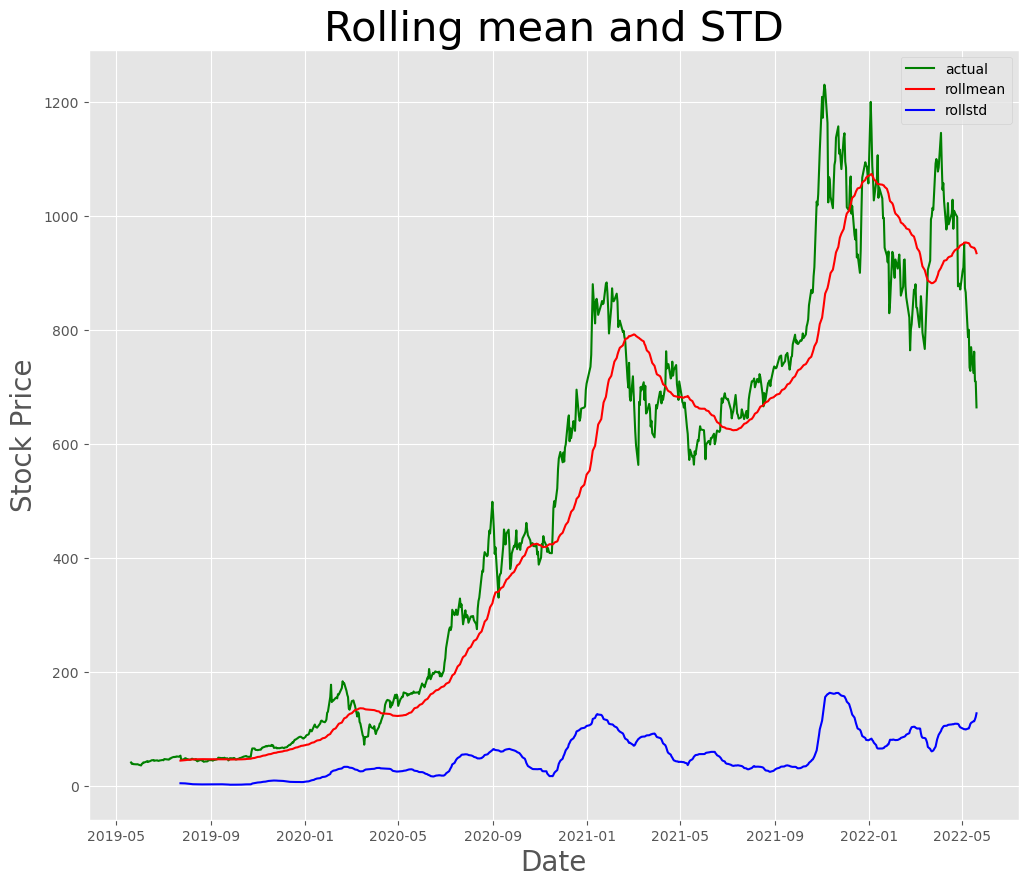

In [24]:
stationarity_check(stock_data['Close'])

<AxesSubplot: >

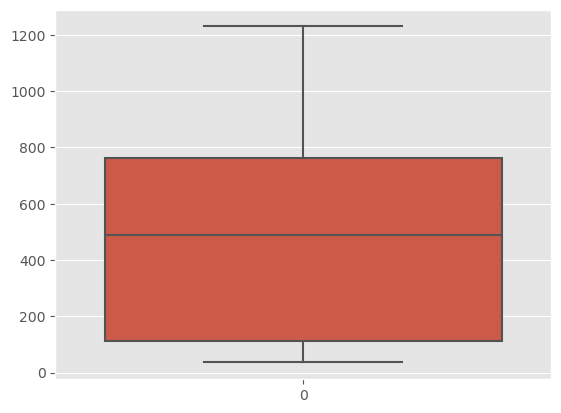

In [25]:
# outlier check -> box plot 
sns.boxplot(stock_data['Close'])

- there is no outlier on this time series data 

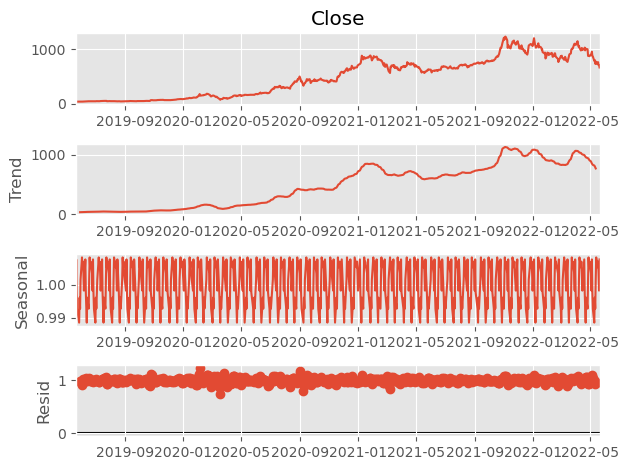

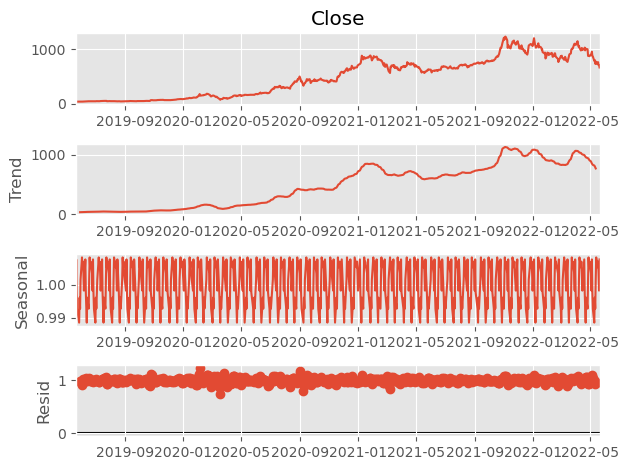

In [26]:
# Decompostion cehck
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data['Close'] , period=12,model='multiplicative')

result.plot()

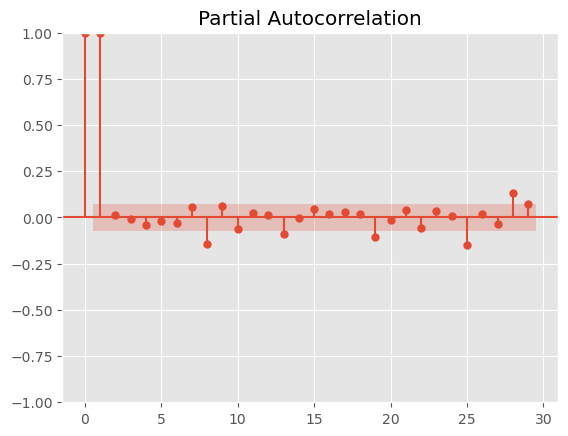

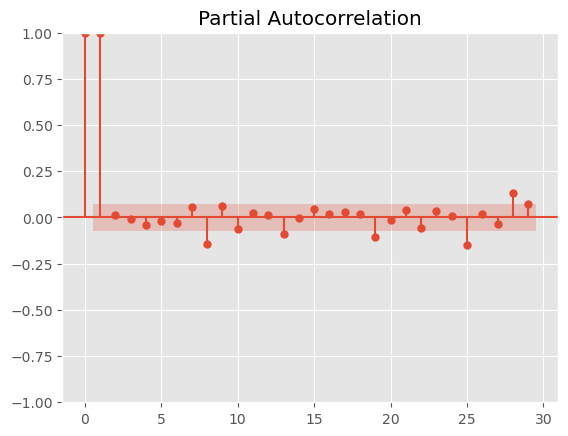

In [27]:
# acf and pacf plot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(stock_data['Close'])


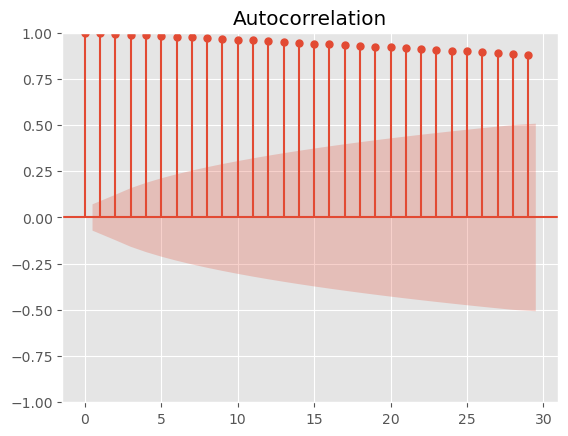

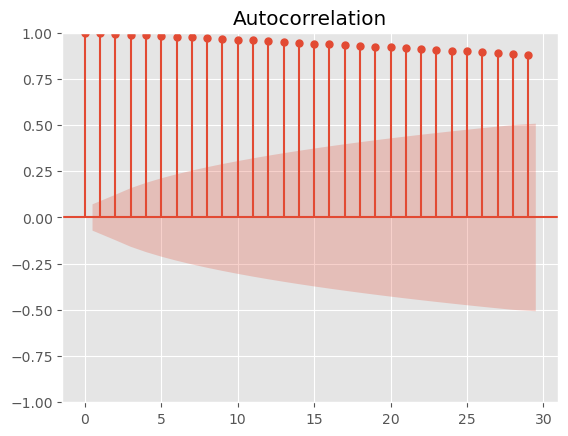

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock_data['Close'])

## Preprocessing of the data 
- Missing value handled (not required here)
- outlier hadnled (not required here)
- transformation if necessary (required)
- normalise if necessary (not required)
- train test split (required )

In [29]:
#transformation -> by differencing method 
diff = stock_data['Close'].diff()
diff.dropna(inplace=True)

In [30]:
diff

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

Test Stats    -8.324564e+00
P value        3.498786e-13
Lag value      8.000000e+00
Data Points    7.480000e+02
dtype: float64


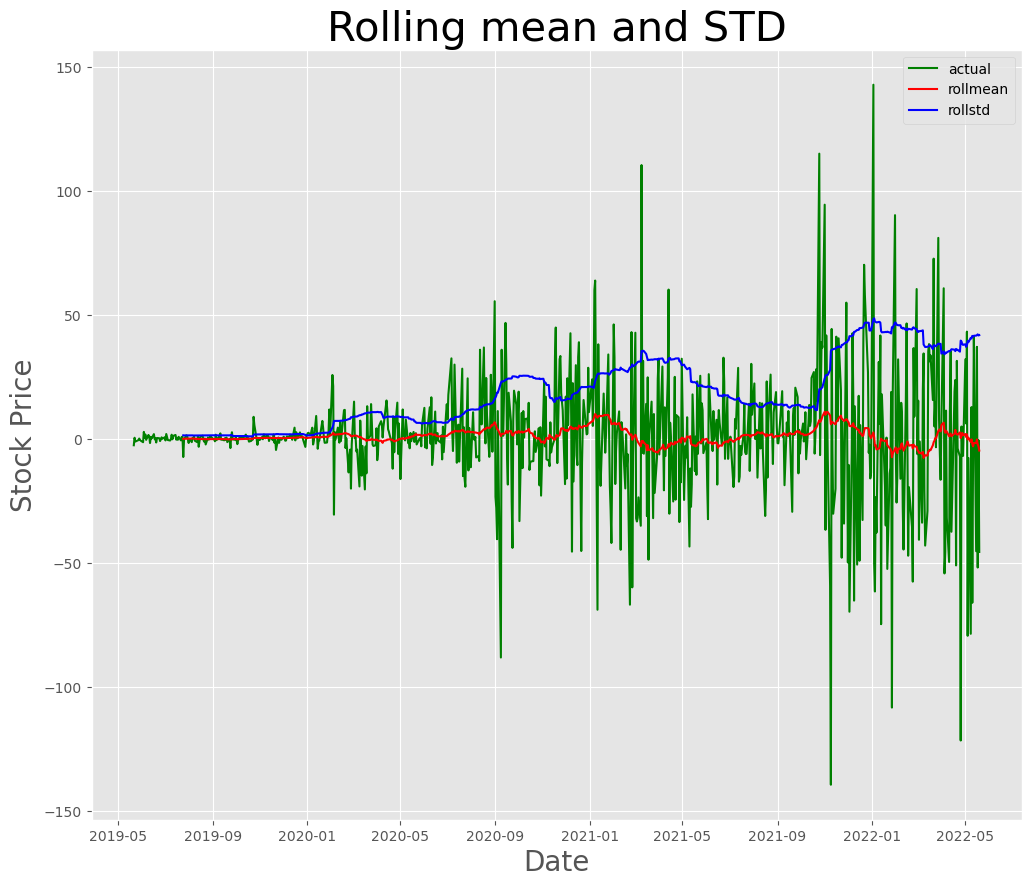

In [31]:
# check stationary hoyeche kina 
stationarity_check(diff)

- p value< 0.05 -> stationary data 

In [32]:
# train test split 
# last 60 data for test 
train_data = diff[0:-60]
test_data = diff[-60:]

In [33]:
train_data

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

## Model Building 

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [35]:
# model creation 

# train data ke list er moddhe ditey hbe 
history = [i for i in train_data]

model = ARIMA(history,order=(2,1,1))

# fit the model 
model = model.fit()

#predict 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3148.382
Date:                Wed, 24 Apr 2024   AIC                           6304.764
Time:                        18:33:25   BIC                           6322.945
Sample:                             0   HQIC                          6311.794
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0294      0.025     -1.175      0.240      -0.078       0.020
ar.L2         -0.0370      0.023     -1.585      0.113      -0.083       0.009
ma.L1         -0.9999      0.113     -8.852      0.000      -1.221      -0.779
sigma2       492.5902     56.397      8.734      0.000     382.054     603.127
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2094.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              31.65   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# prediction of the model
# test data r first er ta predict korbe 
pred = model.forecast()
pred

array([2.20781781])

In [37]:
test_data[0]

9.0999755859375

In [38]:
pred[0]

2.2078178054816107

In [39]:
# calculate rmse 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error([test_data[0]],pred[0])
rmse = np.sqrt(mse)
print(rmse)


TypeError: Singleton array 9.0999755859375 cannot be considered a valid collection.

In [40]:
# function for training the model 

def train_model(train,test,order):
    
    #train data ke convert to list 
    history = [i for i in train]
    # prediction er list banabo 
    prediction=[]
    
    #every test data r prediction korbo tai for loop
    for i in range(len(test)):
        #model creation 
        model = ARIMA(history,order=order)
        # fit the model 
        model = model.fit()
        #prediction 
        pred = model.forecast()
        #store in the list 
        prediction.append(pred)
        #jetar pred hoye jabe setake history r moddhe apppend korey next model ke train korabo 
        history.append(test[i])
    
    #calculate rmse 
    mse = mean_squared_error(test,prediction)
    rmse = np.sqrt(mse)
    
    return rmse

In [46]:
# call the funciton 
train_model(train_data,test_data,(2,0,0))

39.74611724745828

In [44]:
# fucntion jekhane p,d,q tar alada alada combination nebo 

p_value = range(0,3)
d_value = range(0,3) 
q_value = range(0,3)

def evaluate_model(train,test,p_value,d_value,q_value):
    
    #error and best configuration variable banabo 
    error = float('inf')
    best_cfg = None
    
    #train data ke float e convert 
    train = train.astype('float')
    
    #p,d,q er combination 
    for p in p_value:
        for d in d_value:
            for q in q_value:
                order = (p,d,q)
                #model train fucntion call korbo 
                try :
                    rmse = train_model(train,test,order)
                    if rmse < error:
                        #rmse jodi current error theke kom hoi then update error and best confg
                        error=rmse
                        best_cfg=order
                        
                    print('ARIMA%s RMSE=%.3f' %(order,rmse))
                    
                except:
                    continue
    
    print('Best ARIMA%s RMSE=%.3f'% (best_cfg,error))
                
                
    
    

In [45]:
evaluate_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 0) RMSE=39.610
ARIMA(0, 0, 1) RMSE=39.578
ARIMA(0, 0, 2) RMSE=39.728
ARIMA(0, 1, 0) RMSE=57.835
ARIMA(0, 1, 1) RMSE=39.611
ARIMA(0, 1, 2) RMSE=39.580
ARIMA(0, 2, 0) RMSE=104.683
ARIMA(0, 2, 1) RMSE=57.876


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2) RMSE=39.581
ARIMA(1, 0, 0) RMSE=39.570
ARIMA(1, 0, 1) RMSE=39.636


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2) RMSE=40.047
ARIMA(1, 1, 0) RMSE=46.184
ARIMA(1, 1, 1) RMSE=39.572
ARIMA(1, 1, 2) RMSE=39.731
ARIMA(1, 2, 0) RMSE=68.740
ARIMA(1, 2, 1) RMSE=46.221


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

ARIMA(1, 2, 2) RMSE=39.585
ARIMA(2, 0, 0) RMSE=39.746
ARIMA(2, 0, 1) RMSE=39.884


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

ARIMA(2, 0, 2) RMSE=40.086
ARIMA(2, 1, 0) RMSE=45.781
ARIMA(2, 1, 1) RMSE=39.739
ARIMA(2, 1, 2) RMSE=39.732
ARIMA(2, 2, 0) RMSE=63.008
ARIMA(2, 2, 1) RMSE=45.808


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

ARIMA(2, 2, 2) RMSE=2689.707
Best ARIMA(1, 0, 0) RMSE=39.570


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- best arima model whose oder is (1,0,0)

In [57]:
# now create the best model and predict data 
history = [i for i in train_data]
prediction = []

for i in range(len(test_data)):
    model = ARIMA(history,order=(1,0,0))

    model = model.fit()
    
    pred = model.forecast(alpha=0.05)
    
    prediction.append(pred)
    
    history.append(test_data[i])
    
mse = mean_squared_error(test_data,prediction)
rmse= np.sqrt(mse)

print(rmse)
    
    

39.56959976776051


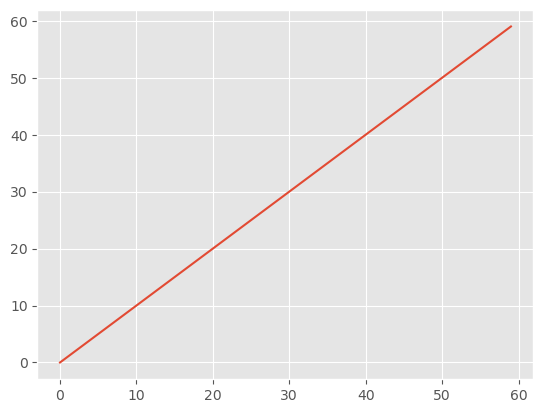

In [59]:
plt.plot(range(len(test_data)))

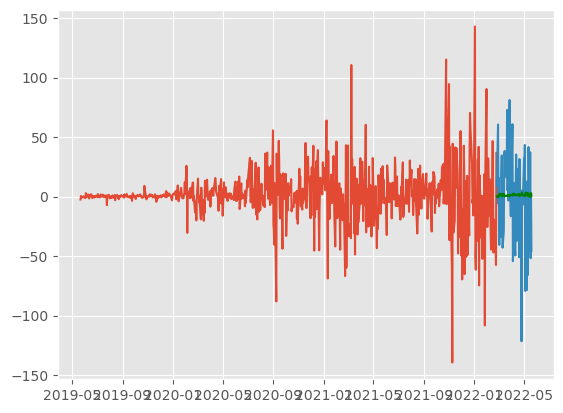

In [58]:
# plot the curve  test data and predcition 

fc_series = pd.Series(prediction,index=test_data.index)

plt.plot(train_data)
plt.plot(test_data)
plt.plot(fc_series,color='green')